In [1]:
import pandas as pd

## 파일 읽어 오기 

In [7]:
x_train=pd.read_csv('human_acivity/train/X_train.txt',sep='\s+')
y_train=pd.read_csv('human_acivity/train/y_train.txt',sep='\s+')
x_test=pd.read_csv('human_acivity/test/X_test.txt',sep='\s+')
y_test=pd.read_csv('human_acivity/test/y_test.txt',sep='\s+')
features=pd.read_csv('human_acivity/features.txt',sep=' ', header=None)
feature_names = features.iloc[:, 1].tolist()
x_train.columns = feature_names
x_test.columns = feature_names

## 전처리 :피처
#중복된 피처명 처리

In [8]:
features.set_index(0,inplace=True)

In [9]:
features[[1]]

,1
0,
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y
...,...
557,"angle(tBodyGyroMean,gravityMean)"
558,"angle(tBodyGyroJerkMean,gravityMean)"
559,"angle(X,gravityMean)"


In [10]:
features[features.duplicated([1])].values.tolist()

[['fBodyAcc-bandsEnergy()-1,8'],
 ['fBodyAcc-bandsEnergy()-9,16'],
 ['fBodyAcc-bandsEnergy()-17,24'],
 ['fBodyAcc-bandsEnergy()-25,32'],
 ['fBodyAcc-bandsEnergy()-33,40'],
 ['fBodyAcc-bandsEnergy()-41,48'],
 ['fBodyAcc-bandsEnergy()-49,56'],
 ['fBodyAcc-bandsEnergy()-57,64'],
 ['fBodyAcc-bandsEnergy()-1,16'],
 ['fBodyAcc-bandsEnergy()-17,32'],
 ['fBodyAcc-bandsEnergy()-33,48'],
 ['fBodyAcc-bandsEnergy()-49,64'],
 ['fBodyAcc-bandsEnergy()-1,24'],
 ['fBodyAcc-bandsEnergy()-25,48'],
 ['fBodyAcc-bandsEnergy()-1,8'],
 ['fBodyAcc-bandsEnergy()-9,16'],
 ['fBodyAcc-bandsEnergy()-17,24'],
 ['fBodyAcc-bandsEnergy()-25,32'],
 ['fBodyAcc-bandsEnergy()-33,40'],
 ['fBodyAcc-bandsEnergy()-41,48'],
 ['fBodyAcc-bandsEnergy()-49,56'],
 ['fBodyAcc-bandsEnergy()-57,64'],
 ['fBodyAcc-bandsEnergy()-1,16'],
 ['fBodyAcc-bandsEnergy()-17,32'],
 ['fBodyAcc-bandsEnergy()-33,48'],
 ['fBodyAcc-bandsEnergy()-49,64'],
 ['fBodyAcc-bandsEnergy()-1,24'],
 ['fBodyAcc-bandsEnergy()-25,48'],
 ['fBodyAccJerk-bandsEnergy()-

In [11]:
new_columns = features.columns
f_d = features[features.duplicated([1])].values.tolist()
count = 1
for c in f_d:
    indexs = [i for i, x in enumerate(new_columns) if x == c]
    for idex in indexs:
        new_columns.values[idex] = f"{column}_{count}"
        count += 1

features.columns = new_columns

In [12]:
features[:3]

,1
0,
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z


In [13]:
features.shape

(561, 1)

In [14]:
feature_names[:3]

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

In [15]:
x_train.columns = feature_names
x_test.columns = feature_names

## 하이퍼 파라미터 default

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt_clf =DecisionTreeClassifier(random_state=11)

dt_clf.fit(x_train,y_train)

pred=dt_clf.predict(x_test)

acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc}'

'테스트 데이터 세트 정확도 : 0.8615071283095723'

In [23]:
y_train.iloc[:, 0].unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

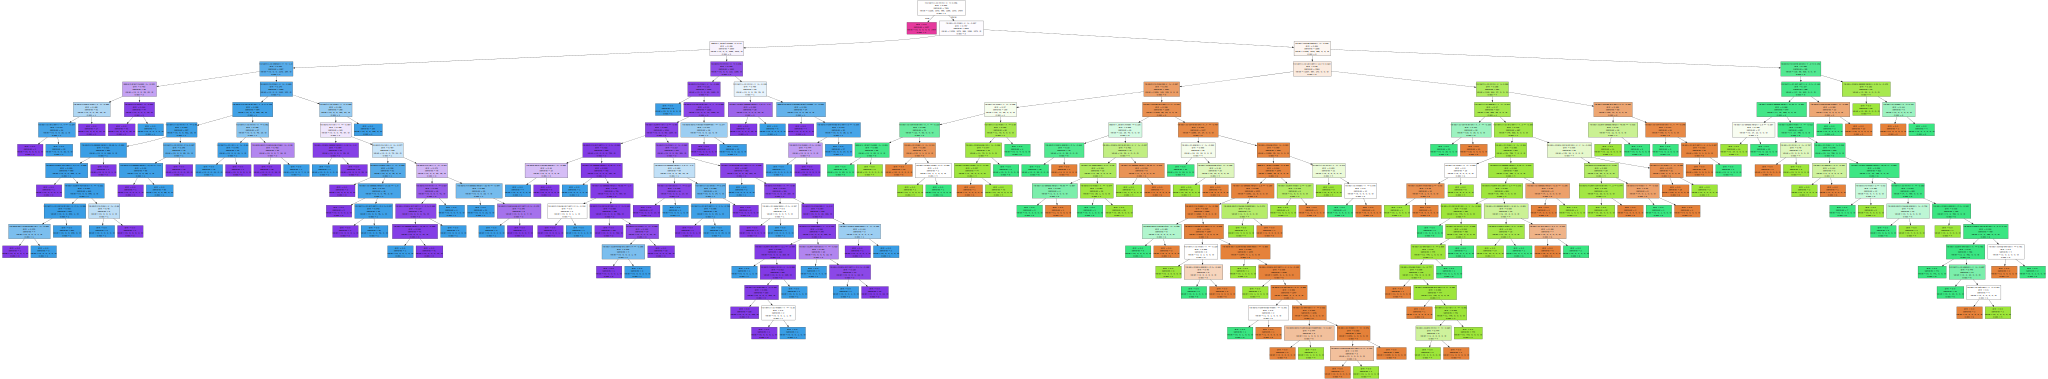

In [17]:
from sklearn.tree import export_graphviz

y_train_str = y_train.iloc[:, 0].astype(str)
export_graphviz(dt_clf,
                out_file='default.dot',
                class_names=y_train_str.unique(),
                feature_names=feature_names,
                filled=True,
               )

import graphviz

with open('default.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

In [26]:
### 하이퍼 파라미터 max_depth =5

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth_max_list = [5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20]
min_samples_split_list = [12, 14, 16, 18]

train_acc_list = []

for depth in depth_max_list:
    for min_samples_split in min_samples_split_list:
        tree_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split)
        tree_clf.fit(x_train, y_train)
        
        pred = tree_clf.predict(x_test)
        
        acc = accuracy_score(y_test, pred)
        
        test_acc_list.append(acc)


df = pd.DataFrame(test_acc_list, index=depth_max_list)
print(df)

ValueError: Shape of passed values is (96, 1), indices imply (12, 1)